# Predicting House Prices

In this case study, we will use one Kaggle’s House Prices: Advanced Regression Techniques dataset to predict house price prediction. We will only use train dataset, since we don’t have the house price columns on test data.   
Datasets can be found at: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
  
You are a data scientist helping a real estate industry to predict house prices. By doing this challenge, you will step into Machine Leaning World. House price prediction is very well known a common problem. During this case study, you will get familiar with one basic Machine Learning Algorithm, Linear Regression and one advance Machine Learning Algorithm, Random Forest.  
  
Your analysis must be able to address the following requests:  
1. Prepare your dataset to do prediction house prices
2. When your dataset is ready (no missing values, correct datatype, no unnecessary
columns), start with Linear Regression.
3. After that, try to improve the prediction with regularization.
4. Try to predict the prices, using Random Forest
5. Show which features are the most helpful to predict house prices using random forest
6. In all steps, please cross validate your score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8

In [2]:
# Machine Learning Packages

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [3]:
data = pd.read_csv('/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/Predicting House Prices - Machine Learning/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.drop(['Fence','MiscFeature','PoolQC','FireplaceQu','Alley'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Street           1094 non-null object
LotShape         1094 non-null object
LandContour      1094 non-null object
Utilities        1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null object
Neighborhood     1094 non-null object
Condition1       1094 non-null object
Condition2       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
RoofMatl         1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non

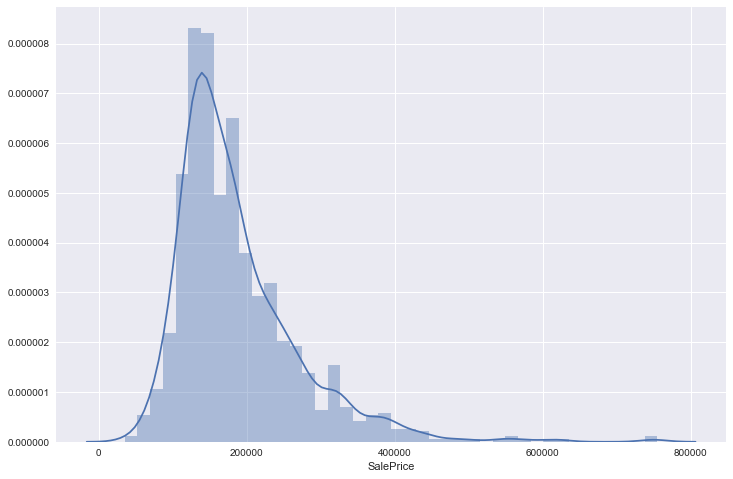

In [9]:
sns.distplot(data.SalePrice);

In [10]:
data['LogofSalePrice'] = np.log(data.SalePrice)

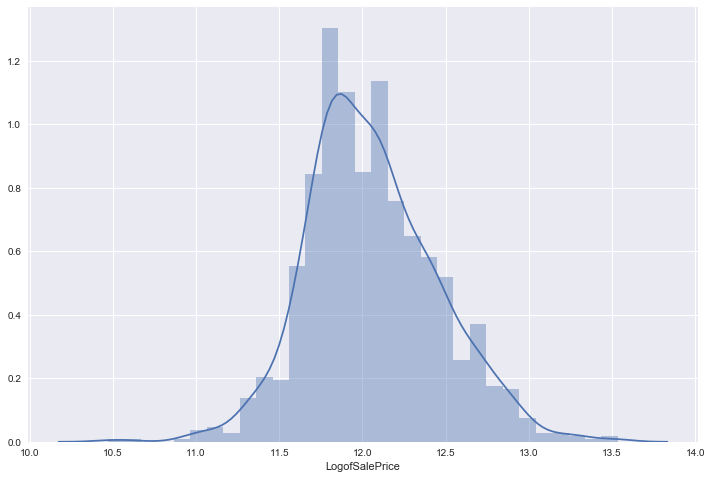

In [11]:
sns.distplot(data.LogofSalePrice);          # Normalizing

In [12]:
data.drop(['SalePrice'],axis=1,inplace=True)      # Because we are trying to predict it

---

## Modeling

In [13]:
#Target
y = data.LogofSalePrice          

In [14]:
data_temp = data.select_dtypes(include=['int64','float64'])

In [15]:
data_temp.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LogofSalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216


In [16]:
#Predictor
x = data_temp.drop(['LogofSalePrice'],axis=1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 3)

## Linear Regression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
yr_hat = lr.predict(x_test)

In [21]:
yr_hat

array([ 12.22267951,  12.74345364,  11.74811212,  12.11594295,
        11.72135136,  12.71633363,  12.4968461 ,  11.94022601,
        11.83009107,  11.63865965,  12.30313165,  11.46783698,
        11.77587206,  12.10704901,  12.26583784,  12.42845917,
        12.10371832,  12.04455465,  11.8697762 ,  12.35255308,
        12.2056231 ,  11.9777607 ,  11.5357217 ,  11.10244193,
        11.75352373,  11.61733498,  12.49748378,  11.77176654,
        11.96900567,  11.79831985,  11.61302327,  12.18183595,
        12.38926798,  11.74063943,  12.10436239,  12.5596271 ,
        12.09311841,  12.14138723,  12.47838402,  11.70206125,
        12.23310275,  12.51424176,  11.62742154,  11.7012018 ,
        11.91261865,  11.66372564,  11.57766668,  12.65149645,
        12.92268535,  12.37080744,  11.57607636,  12.51128216,
        12.26984367,  11.89288481,  11.88659725,  11.91093667,
        12.23117833,  11.9673692 ,  11.81238538,  12.73011098,
        12.10210643,  12.4113695 ,  12.18113953,  11.51

In [22]:
lr.score(x_test, y_test)

0.88666371147387824

In [23]:
lr_cv = cross_val_score(lr, x, y, cv=5, scoring='r2')
print(lr_cv.mean())

0.817852618687


## Ridge

In [24]:
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
ridge_cv = cross_val_score(ridge,x,y,cv=5,scoring='r2')      # r2 means R Squared 

In [26]:
print(ridge_cv.mean())

0.817911511864


## Lasso

In [27]:
lasso = Lasso(alpha=.001)

In [28]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
lasso_cv = cross_val_score(lasso, x, y, cv=5, scoring='r2')

/Users/Rudra/Documents/Softs/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [30]:
print(lasso_cv.mean())

0.816677357748


---

## Random Forest

In [31]:
rf = RandomForestRegressor()

In [32]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [33]:
rf_cv = cross_val_score(rf,x,y,cv=5,scoring='r2')

In [34]:
print(rf_cv.mean())

0.840042558621


In [35]:
rf.feature_importances_

array([  6.39523962e-03,   2.76969635e-03,   7.03090259e-03,
         1.38610849e-02,   5.80456505e-01,   1.49889277e-02,
         3.01213576e-02,   2.57155888e-02,   3.12808819e-03,
         2.89035078e-02,   4.59799325e-04,   6.20029285e-03,
         3.40736798e-02,   3.70857062e-02,   1.19131146e-02,
         8.47091424e-06,   9.62836674e-02,   1.23440379e-03,
         1.49911330e-04,   1.05285437e-03,   7.98440194e-04,
         1.97958368e-03,   1.94177900e-04,   5.61879139e-03,
         2.15141078e-03,   7.05155596e-03,   2.40037193e-02,
         3.52073148e-02,   4.80321471e-03,   4.86938038e-03,
         3.10770325e-03,   1.28838868e-04,   1.19272938e-03,
         8.23768480e-05,   4.51464784e-04,   3.72451976e-03,
         2.80197885e-03])

---

## Plotting the feature importance

In [36]:
imp = rf.feature_importances_

In [37]:
feature_imp = zip(imp, x.columns)

In [38]:
feature_imp

In [39]:
feature_imp = sorted(feature_imp,reverse=True)

In [40]:
feature_imp

[(0.58045650503572288, 'OverallQual'),
 (0.09628366740658488, 'GrLivArea'),
 (0.037085706190297316, '1stFlrSF'),
 (0.035207314846891255, 'GarageArea'),
 (0.034073679760752471, 'TotalBsmtSF'),
 (0.03012135755431496, 'YearBuilt'),
 (0.028903507781088945, 'BsmtFinSF1'),
 (0.025715588849098931, 'YearRemodAdd'),
 (0.024003719267835625, 'GarageCars'),
 (0.014988927726164489, 'OverallCond'),
 (0.013861084939374735, 'LotArea'),
 (0.011913114585481194, '2ndFlrSF'),
 (0.0070515559644858828, 'GarageYrBlt'),
 (0.0070309025935747903, 'LotFrontage'),
 (0.0063952396206259417, 'Id'),
 (0.0062002928475675357, 'BsmtUnfSF'),
 (0.0056187913868361609, 'TotRmsAbvGrd'),
 (0.0048693803761381063, 'OpenPorchSF'),
 (0.004803214713037276, 'WoodDeckSF'),
 (0.0037245197589917704, 'MoSold'),
 (0.0031280881915633279, 'MasVnrArea'),
 (0.0031077032494807658, 'EnclosedPorch'),
 (0.0028019788492595734, 'YrSold'),
 (0.0027696963514332066, 'MSSubClass'),
 (0.0021514107830951116, 'Fireplaces'),
 (0.0019795836785623717, 'Bed

In [41]:
top10predictors = feature_imp[:10]

In [42]:
values = [value for value, predictors in top10predictors]

In [43]:
predictors = [predictors for value, predictors in top10predictors]

In [44]:
print(predictors)

['OverallQual', 'GrLivArea', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1', 'YearRemodAdd', 'GarageCars', 'OverallCond']


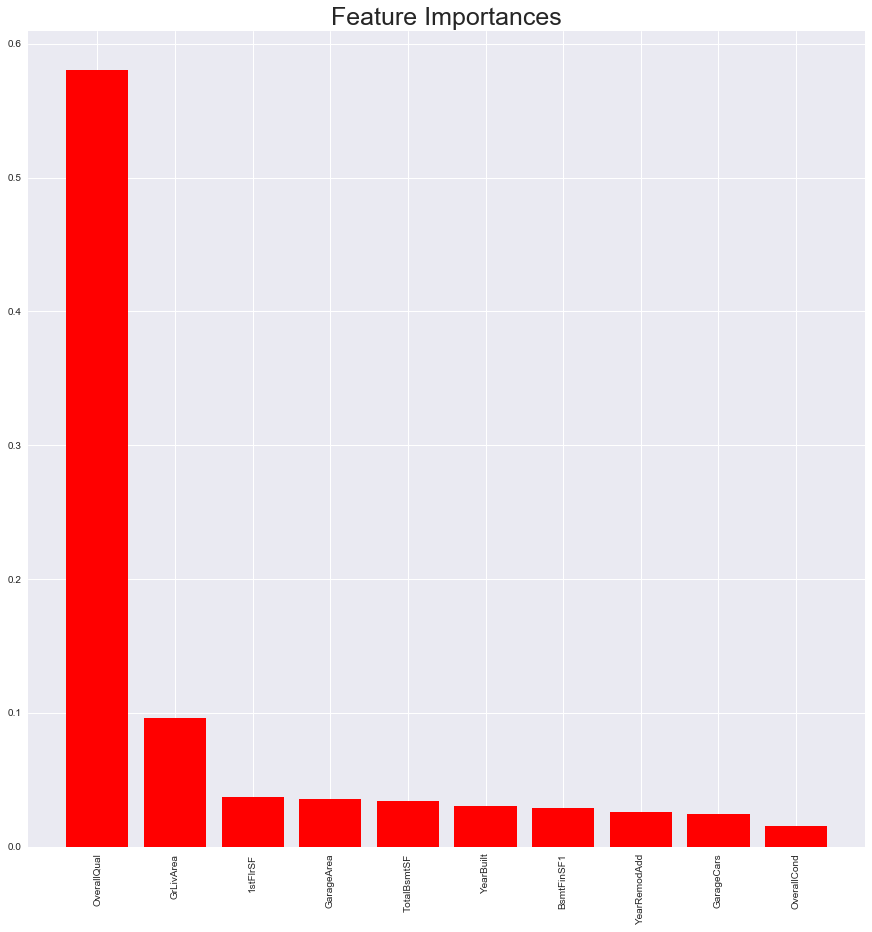

In [45]:
plt.figure(figsize=(15,15))
plt.title('Feature Importances', size=25)
plt.bar(range(len(predictors)), values, color='r', align = 'center')
plt.xticks(range(len(predictors)),predictors,rotation=90);

**These are the features which are most useful in predicting House Prices using Random Forest**